


#**A supervised classification model for term deposit prediction**


###**Abstract**:

####The bank pertaining to the dataset is facing a revenue decline. Knowing that term deposits allow the bank to hold on to a deposit for a fixed time and improve financial gains, they decided to create a machine learning model which predicts the capability of their existing clients to subscribe to a term deposit.

###**Problem Statement**:

####The dataset in our procession is related with the direct marketing campaigns of this banking institution. The classification goal is to predict if the client will subscribe to a term deposit. 



### **Bank client data**:

####Lets take a look at the various feature columns:
 
1. Age (numeric)
2. Job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
17. cons.price.idx: consumer price index — monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
19. euribor3m: euribor 3 month rate — daily indicator (numeric)
20. nr.employed: number of employees — quarterly indicator (numeric)

###**Output variable:**
21. y: has the client subscribed a term deposit? (binary: ‘yes’,’no’)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

###**1. Data Collection**

In [2]:
#drive.mount('/content/gdrive')
#df = pd.read_csv("/content/gdrive/My Drive/project/bank-additional-full.csv", sep=';')
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print('There are', df.shape[0], 'observations and',df.shape[1], 'Features including target "y" in the dataset')

There are 41188 observations and 21 Features including target "y" in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### **2. Exploratory Data analysis**

In [7]:
sns.set_theme(style="whitegrid")

In [8]:
# Countplot of target column

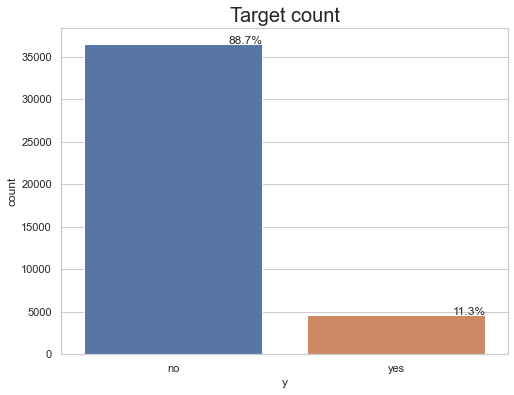

In [9]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='y', data = df)
total = float(len(df))
plt.title('Target count', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

This is an imbalanced dataset since 88.7% of target is 'NO' and only 11.3% of target is 'YES'

#### **2.1 Univariate Data Analysis**

In [10]:
#Plotting count of Job Distribution

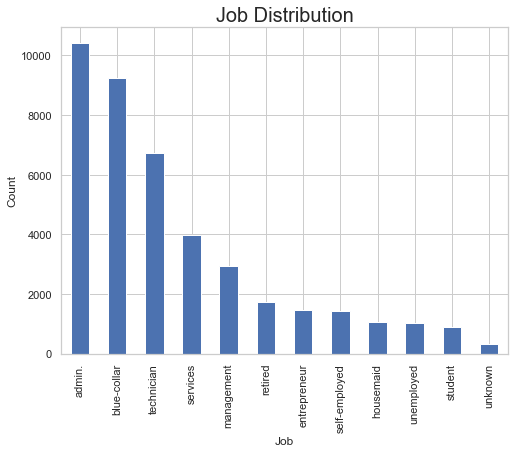

In [11]:
job_count = df['job'].value_counts()
plt.figure(figsize = (8, 6))
job_count.plot(kind = "bar")
plt.title("Job Distribution",fontsize=20)
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

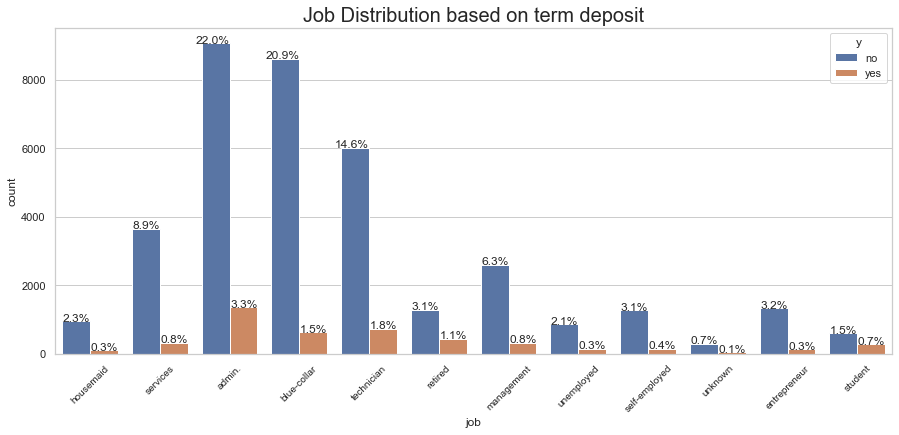

In [12]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='job', data = df, hue='y')
total = float(len(df))
plt.title('Job Distribution based on term deposit', fontsize=20)
plt.xticks(rotation = 45,fontsize = 10)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

In the dataset the majority are from Admin, blue collar and technician jobs & most of the term deposit subscibers are also from these categories.

In [13]:
#Plotting count of Marital Distribution

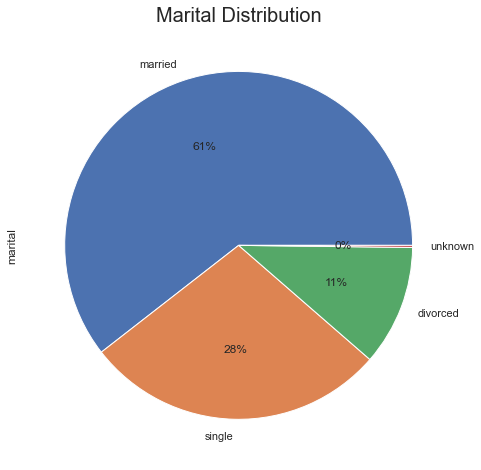

In [14]:
mar_count = df['marital'].value_counts()
plt.figure(figsize = (8, 8))
mar_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Marital Distribution",fontsize=20)
plt.show()

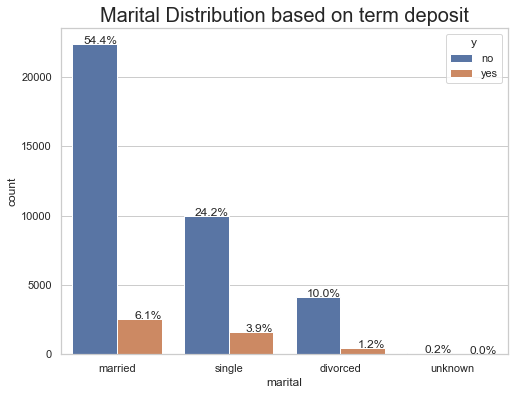

In [15]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='marital', data = df, hue='y')
total = float(len(df))
plt.title('Marital Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

As most of the clients are married, both term deposit acceptance and rejection rate is significant among them.

In [16]:
#Plotting count of Credit in default Distribution

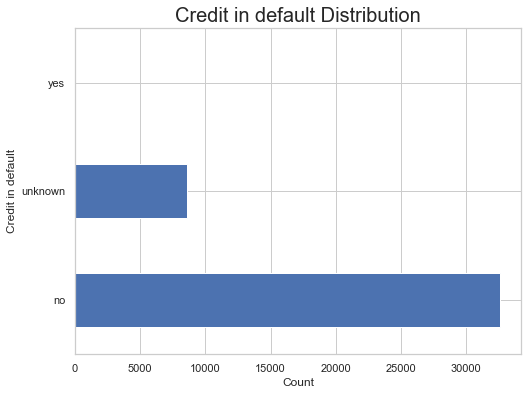

In [17]:
cred_count = df['default'].value_counts()
plt.figure(figsize = (8, 6))
cred_count.plot(kind = "barh")
plt.title("Credit in default Distribution",fontsize=20)
plt.ylabel("Credit in default")
plt.xlabel("Count")
plt.show()

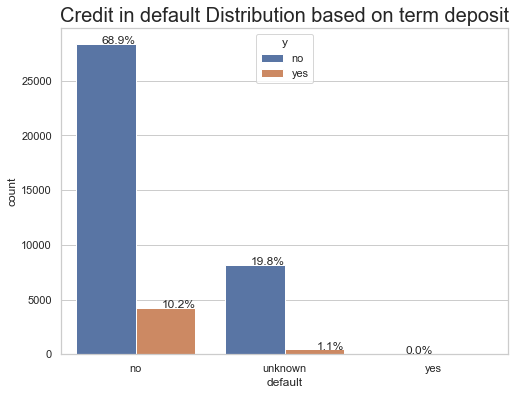

In [18]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='default', data = df, hue='y')
total = float(len(df))
plt.title('Credit in default Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Compared to other features presence of unknown value is more in this particular feature.

In [19]:
#Plotting count of Housing loan Distribution

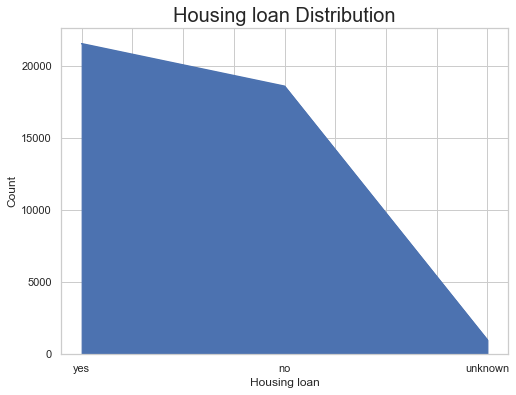

In [20]:
hou_count = df['housing'].value_counts()
plt.figure(figsize = (8, 6))
hou_count.plot(kind = "area")
plt.title("Housing loan Distribution",fontsize=20)
plt.xlabel("Housing loan")
plt.ylabel("Count")
plt.show()

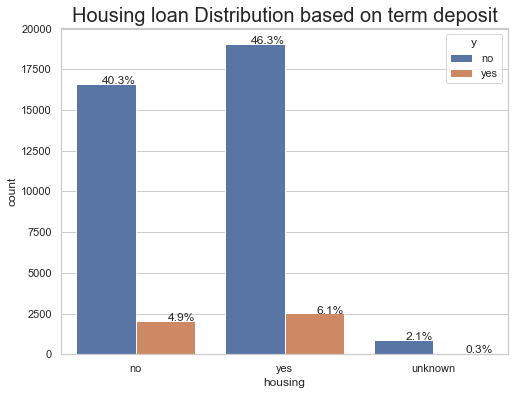

In [21]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='housing', data = df, hue='y')
total = float(len(df))
plt.title('Housing loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

6.1% clients subscribed term depoit eventhough they had housing loan.

In [22]:
#Plotting count of Job Distribution of Clients with personal loan

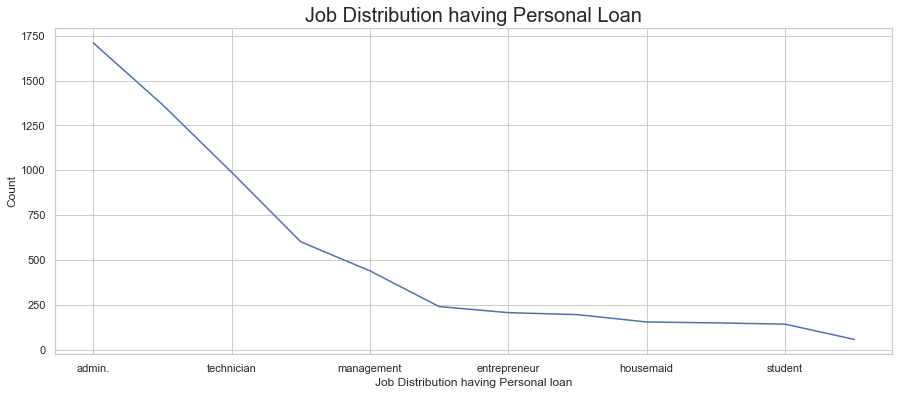

In [23]:
plt.figure(figsize = (15, 6))
job_count_yes = df[df['loan']=='yes']
job_count_y=job_count_yes['job'].value_counts()
job_count_y.plot(kind = "line")
plt.title("Job Distribution having Personal Loan",fontsize=20)
plt.xlabel("Job Distribution having Personal loan")
plt.ylabel("Count")
plt.show()

In [24]:
#Plotting count of Personal loan Distribution

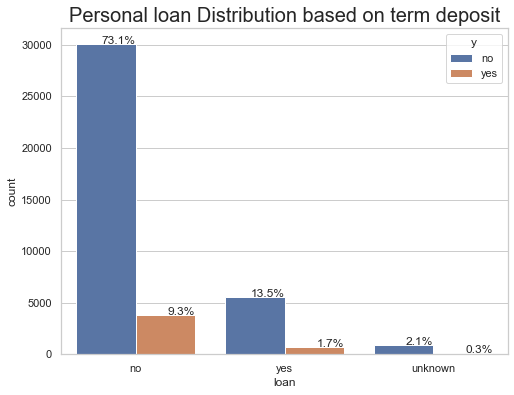

In [25]:
plt.figure(figsize = (8, 6))
target=sns.countplot(x ='loan', data = df, hue='y')
total = float(len(df))
plt.title('Personal loan Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the people are free from personal loan and at the same time 9.3% subscribed the term deposit from that category.

In [26]:
#Pie-chart of Educational distribution of clients

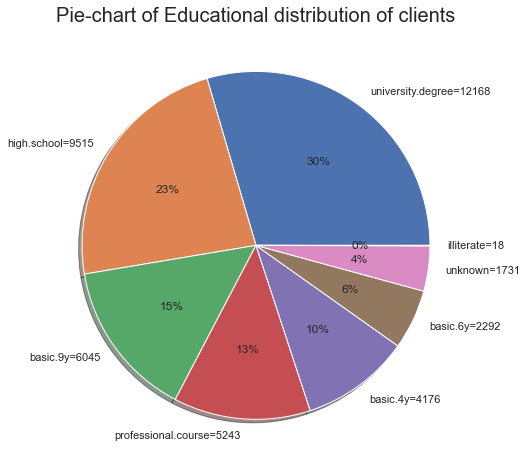

In [27]:
plt.figure(figsize = (8, 8))
education_count = df['education'].value_counts()
plt.pie(education_count, labels=["university.degree=12168","high.school=9515","basic.9y=6045",
"professional.course=5243","basic.4y=4176","basic.6y=2292","unknown=1731","illiterate=18"],autopct='%.0f%%',shadow=True)
plt.title('Pie-chart of Educational distribution of clients',size=20)
plt.show()

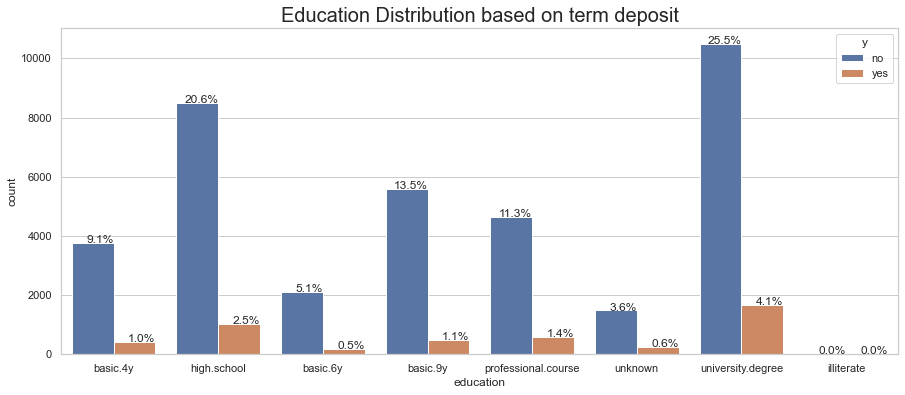

In [28]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='education', data = df, hue='y')
total = float(len(df))
plt.title('Education Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Most of the clients have high school or above education. They constitutes the major part in term deposit subscription. 


In [29]:
#Plotting count of Communication type Distribution

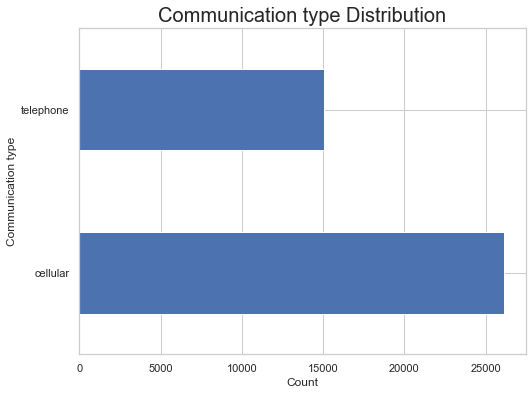

In [30]:
comm_count = df['contact'].value_counts()
plt.figure(figsize = (8, 6))
comm_count.plot(kind = "barh")
plt.title("Communication type Distribution",fontsize=20)
plt.ylabel("Communication type")
plt.xlabel("Count")
plt.show()

In [31]:
#Plotting count of Last contact month Distribution

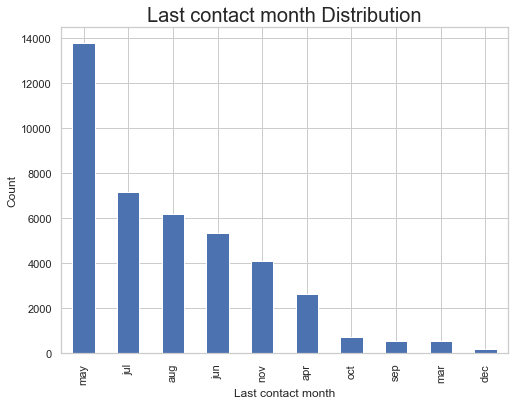

In [32]:
mon_count = df['month'].value_counts()
plt.figure(figsize = (8, 6))
mon_count.plot(kind = "bar")
plt.title("Last contact month Distribution",fontsize=20)
plt.xlabel("Last contact month")
plt.ylabel("Count")
plt.show()

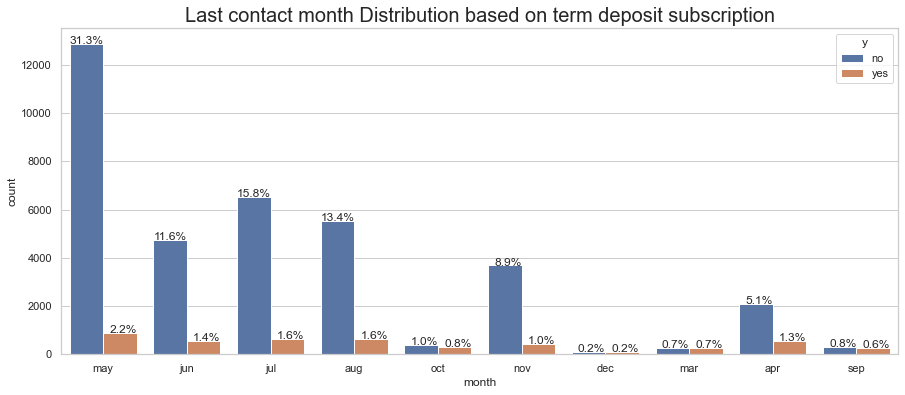

In [33]:
plt.figure(figsize = (15, 6))
target=sns.countplot(x ='month', data = df, hue='y')
total = float(len(df))
plt.title('Last contact month Distribution based on term deposit subscription', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

Eventhough the campaigning was meagre during the months october, december, march and september, we can see that the campaigning was effective as the rate of term deposit subscription  is almost equal to the non subscription. In other months the difference between subscription and non subscription is very high.

In [34]:
#Plotting count of the Last contact day of week Distribution

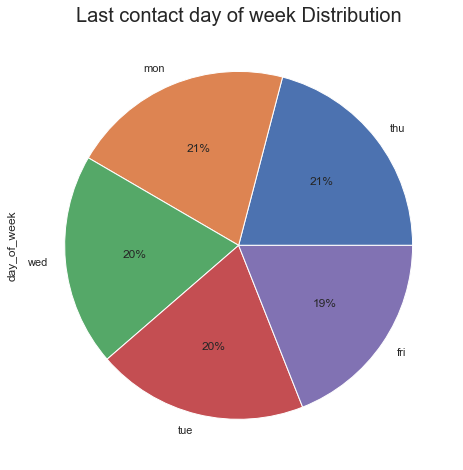

In [35]:
day_count = df['day_of_week'].value_counts()
plt.figure(figsize = (8, 8))
day_count.plot(kind = "pie",autopct='%.0f%%')
plt.title("Last contact day of week Distribution",fontsize=20)
plt.show()

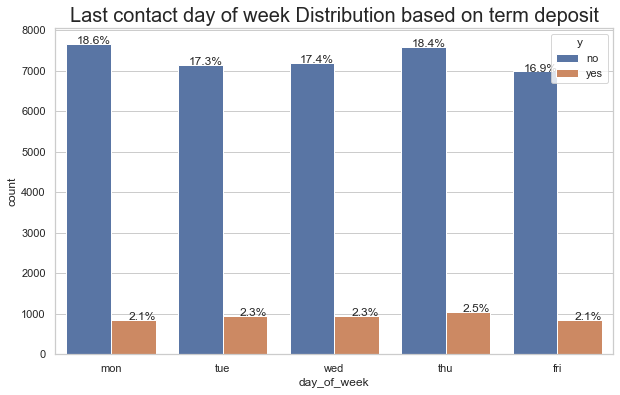

In [36]:
plt.figure(figsize = (10, 6))
target=sns.countplot(x ='day_of_week', data = df, hue='y')
total = float(len(df))
plt.title('Last contact day of week Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The categorical feature last day of contact has no role in term deposit subscription.

In [37]:
#Plotting count of the Outcome of the previous marketing campaign Distribution

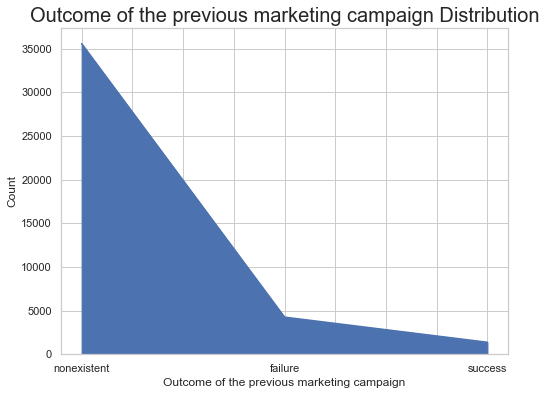

In [38]:
pout_count = df['poutcome'].value_counts()
plt.figure(figsize = (8, 6))
pout_count.plot(kind = "area")
plt.title("Outcome of the previous marketing campaign Distribution",fontsize=20)
plt.xlabel("Outcome of the previous marketing campaign")
plt.ylabel("Count")
plt.show()

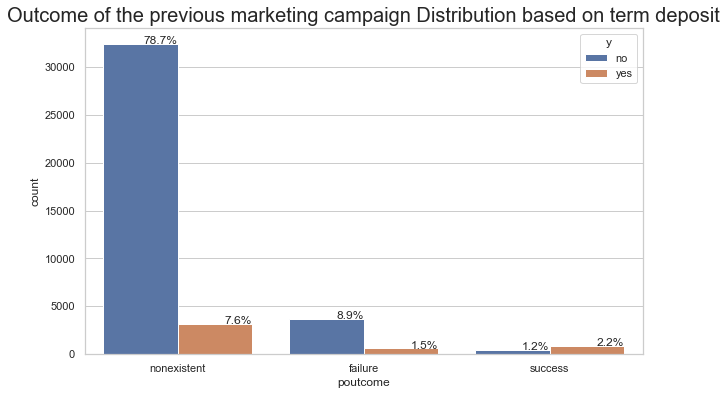

In [39]:
plt.figure(figsize = (10, 6))
target=sns.countplot(x ='poutcome', data = df, hue='y')
total = float(len(df))
plt.title('Outcome of the previous marketing campaign Distribution based on term deposit', fontsize=20)
for p in target.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    target.annotate(percentage, (x, y),ha='right')
plt.show()

The chance of attaining subscription to a new term deposit is higher for  clients who have subscribed term deposit in previous campaigns. Nearly 10% of clients who did not attend the previous campaign has subscribed the term deposit.

### **2.2 Bivariate Data Analysis**

In [40]:
#Plotting 'Duration' vs 'campaign'

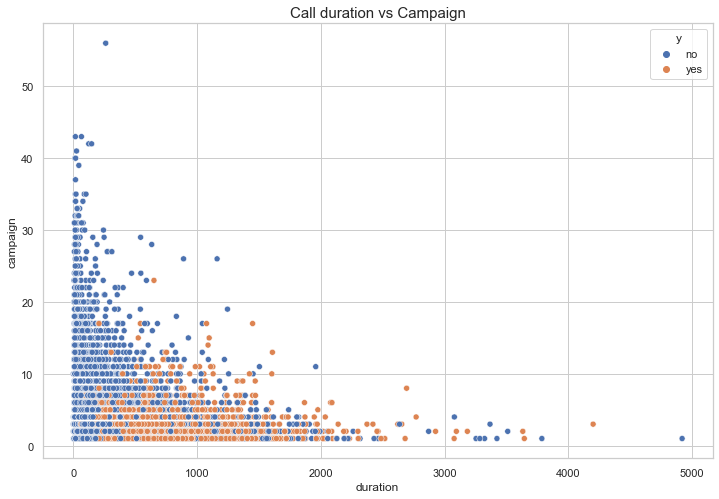

In [41]:
plt.figure(figsize = (12, 8))
plt.title('Call duration vs Campaign',size=15)
sns.scatterplot(data=df, x='duration', y ='campaign', hue='y')
plt.show()

There is an increase in tendency to take term deposit with the increase in call duration. As the number of contacts performed increases the chance of subscription decreases.

In [42]:
#Plotting 'Job' vs 'age'

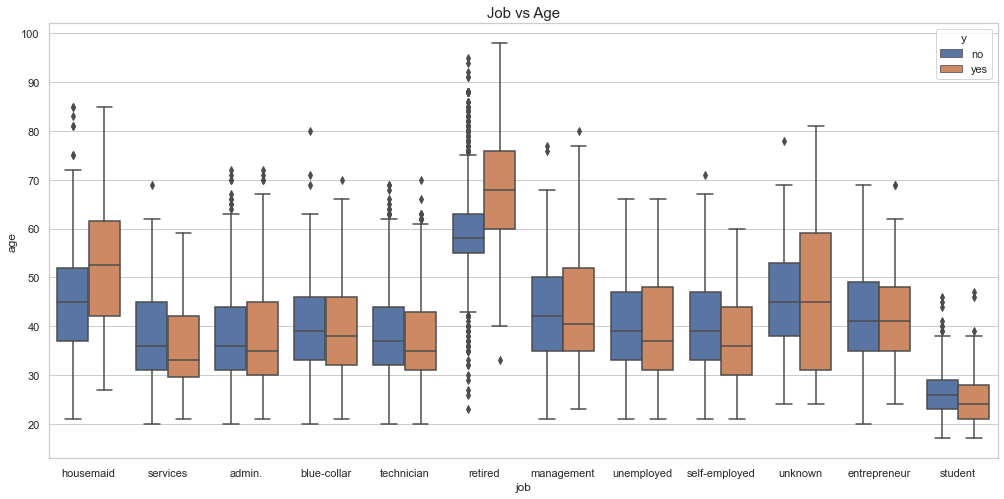

In [43]:
plt.figure(figsize = (17, 8))
sns.boxplot(data=df, x='job', y='age',hue='y')
plt.title('Job vs Age',size=15)
plt.show()

Median age of the clients are in between 30 and 50.

In [44]:
#Plotting 'previous' vs 'duration'

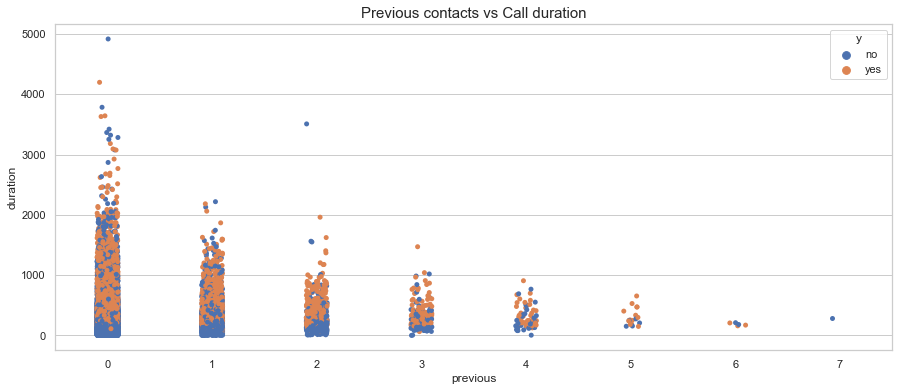

In [45]:
plt.figure(figsize = (15, 6))
plt.title('Previous contacts vs Call duration',size=15)
sns.stripplot(x='previous',y= "duration",hue='y', data=df)
plt.show()

Term deposit subscription depends on call duration rather than number of contacts perfomed before this campaign. 

In [46]:
#Plotting 'age' vs 'duration'

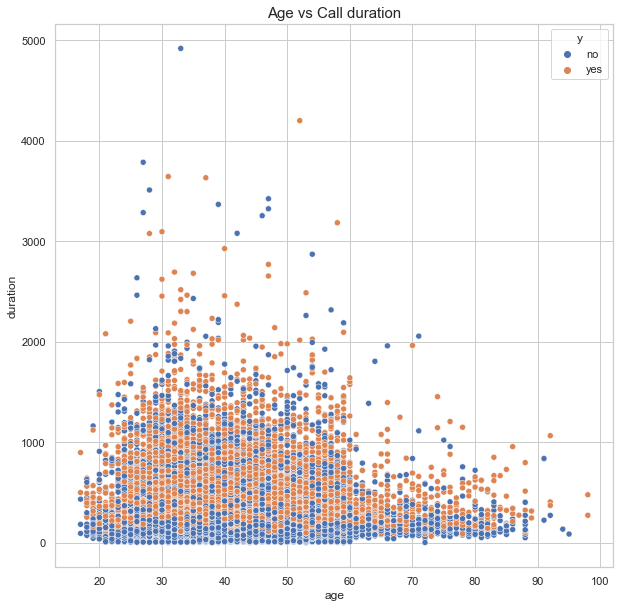

In [47]:
plt.figure(figsize=(10,10))
plt.title('Age vs Call duration',size=15)
sns.scatterplot(x ='age',y= 'duration',hue='y', data=df)
plt.show()

Age has no specific dependance on term deposit subscription. It depends mainly on call duration. 

## **3**. **Preprocessing** 

### **3.1 Missing Value Handling**

In [48]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

isna() function gives no Missing values but there are missing vlaues as 'unknown'

Since it's an imbalanced dataset, We have already decided to oversample our data set. So, removing 'unknown' values having target y= 'NO' and keeping the rest 'unknown' values as separate category for acquiring better results.


In [49]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [50]:
df=df[(df['default']!='unknown')&(df['job']!='unknown')&(df['marital']!='unknown')&(df['education']!='unknown')&(df['loan']!='unknown')&(df['housing']!='unknown')|(df['y']=='yes')]
df.shape

(31269, 21)

In [51]:
df.y.value_counts()

no     26629
yes     4640
Name: y, dtype: int64

**Removing Biased Features**

In [52]:
df['pdays'].value_counts()

999    29831
3        420
6        397
4        112
9         61
2         59
7         56
12        54
10        45
5         45
13        35
11        27
15        22
1         22
14        18
8         17
0         14
16         9
18         7
17         7
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [53]:
df['previous'].value_counts()

0    26405
1     3887
2      686
3      203
4       64
5       18
6        5
7        1
Name: previous, dtype: int64

'pdays' and 'previous' have dominating value as 999 and 0 respectively. Thus removing 'pdays' and 'previous'.

Duration: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

We are creating a predictive model. So, removing 'duration' feature

In [54]:
df=df.drop(['duration','pdays','previous'],axis=1)

### **3.2 Outlier Detection**

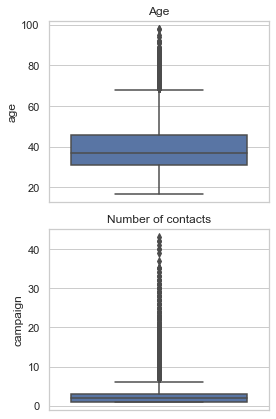

In [55]:
plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
sns.boxplot(y=df['age'])
plt.title("Age")
plt.subplot(2,1,2)
plt.title("Number of contacts")
sns.boxplot(y=df['campaign'])
plt.tight_layout() 
plt.show()

'Campaign' and 'age' show outliers 

In [56]:
for i in ["age", "campaign"]:
        for j in df["y"].unique():
            target_type = df[df["y"] == j]
            column = target_type[i]
            q1 = column.quantile(0.25) 
            q3 = column.quantile(0.75) 
            iqr = q3 - q1 
            upper_limit = q3 + 1.5 * iqr
            lower_limit = q1 - 1.5 * iqr        
            outliers = column[(column > upper_limit) | (column < lower_limit)].index 
            df.drop(index= outliers, inplace=True)

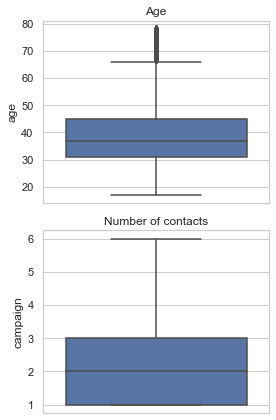

In [57]:
plt.figure(figsize=(4,6))
plt.subplot(2,1,1)
sns.boxplot(y=df['age'])
plt.title("Age")
plt.subplot(2,1,2)
plt.title("Number of contacts")
sns.boxplot(y=df['campaign'])
plt.tight_layout() 
plt.show()

Outliers are removed

In [58]:
df.y.value_counts()

no     24766
yes     4005
Name: y, dtype: int64

### **3.3 Feature Engineering**

In [59]:
df["any_loan"]=(df["housing"]=='yes')| (df["loan"]=='yes')

In [60]:
df["any_loan"].value_counts()

True     17358
False    11413
Name: any_loan, dtype: int64

### **3.4 Label Encoding**

In [61]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in df.columns:
    if df[i].dtype ==  bool or df[i].dtype == object and i!='y':
        df[i]=label_en.fit_transform(df[i])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,any_loan
0,56,3,1,0,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,7,1,3,0,2,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,0,1,1,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,7,1,3,0,0,2,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,1
6,59,0,1,5,0,0,0,1,6,1,1,1,1.1,93.994,-36.4,4.857,5191.0,no,0


### **3.5 Feature Reduction**

We need to split dataset before further pre-processing

In [62]:
y = df['y']
x = df.drop('y', axis = 1)

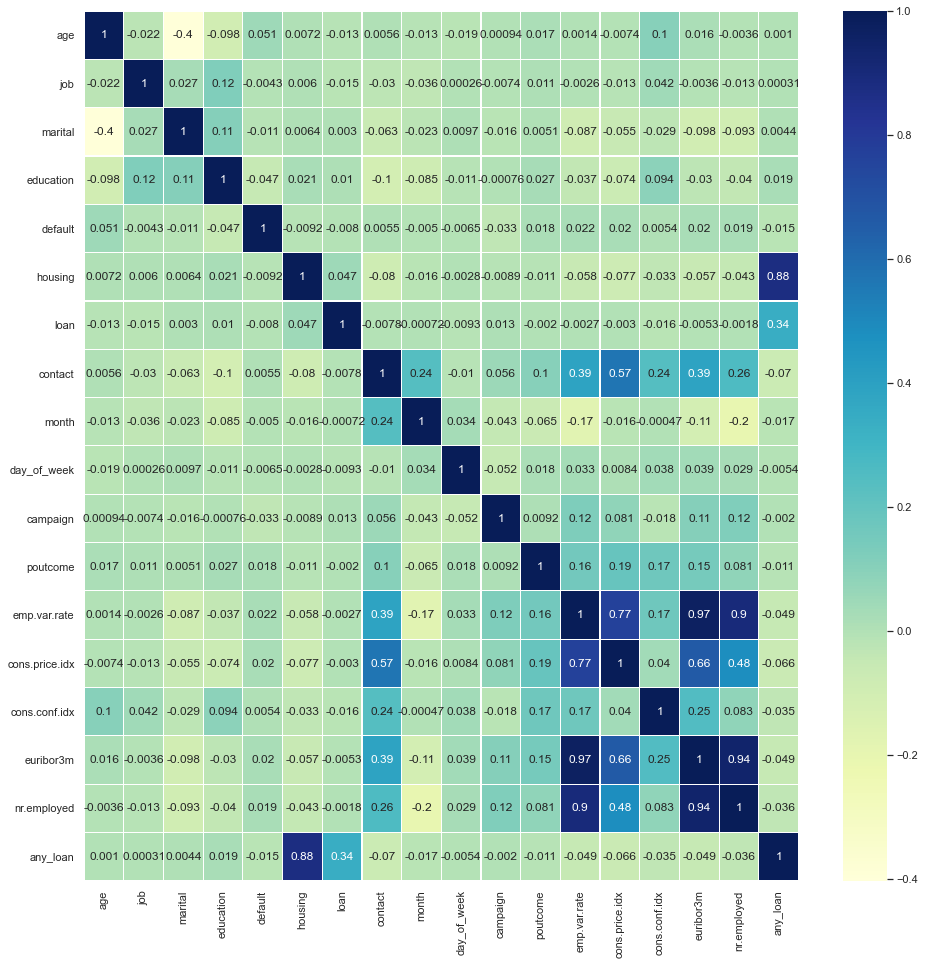

In [63]:
corr=x.corr()
plt.figure(figsize=(16,16))
ax = sns.heatmap(corr, annot=True, linewidths=0.1, linecolor='white',cmap="YlGnBu")

In [64]:
columns = np.full((corr.shape[0]), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8 or corr.iloc[i,j] <= -0.8:
            if columns[i]:
                columns[i] = False
selected_columns = x.columns[columns]
x = x[selected_columns]

In [65]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'any_loan'],
      dtype='object')

### **3.6 Oversampling**

In [66]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE(sampling_strategy='auto', random_state = 0, k_neighbors=5).fit_resample(x,y)

In [67]:
y_smote.value_counts()

no     24766
yes    24766
Name: y, dtype: int64

### **3.7 Standard Scaling**

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_smote[['age','cons.price.idx','cons.conf.idx','nr.employed']] = sc.fit_transform(X_smote[['age','cons.price.idx','cons.conf.idx','nr.employed']])
X_smote.describe()

,age,job,marital,education,default,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,cons.conf.idx,nr.employed,any_loan
count,4.953200e+04,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,49532.000000,4.953200e+04,4.953200e+04,4.953200e+04,49532.000000
mean,1.543580e-15,3.739845,1.156404,3.894573,0.018493,0.250182,0.224259,4.246305,1.928370,1.702394,0.912299,-5.376639e-14,-4.463682e-15,-1.553279e-13,0.507793
std,1.000010e+00,3.624636,0.621912,2.002681,0.135176,0.631583,0.417098,2.540250,1.348591,1.055103,0.449034,1.000010e+00,1.000010e+00,1.000010e+00,0.499944
min,-1.994452e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.961124e+00,-1.936832e+00,-1.932390e+00,0.000000
25%,-7.311319e-01,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,-8.649073e-01,-1.092961e+00,-6.333328e-01,0.000000
50%,-2.799461e-01,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,1.000000,7.947608e-03,-2.857792e-01,-3.691372e-01,1.000000
75%,6.224254e-01,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2.000000,1.000000,8.792184e-01,7.048527e-01,1.119126e+00,1.000000
max,3.510014e+00,11.000000,3.000000,7.000000,2.000000,2.000000,1.000000,9.000000,4.000000,6.000000,2.000000,2.103750e+00,2.447631e+00,1.119126e+00,1.000000


Standard scaling done for age, consumer price index, consumer confidence index and the number of employees in the bank since they are continuous values.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state = 5, test_size = .3)

Split the data as 70% train and 30% test sets by using train_test_split 

# **4. Modeling**

### **4.1 Logistic Regression**

In [70]:
#importing logistic regression from linear model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_predict = logit_model.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [72]:
print("Accuracy is :", accuracy_score(y_test,y_predict))
print("Precision is :", precision_score(y_test,y_predict, average='macro'))
print("Recall is :", recall_score(y_test,y_predict, average='macro'))
print("F1 score is :", f1_score(y_test,y_predict, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_predict))

Accuracy is : 0.7712651413189772
Precision is : 0.771437644957943
Recall is : 0.7712898862279327
F1 score is : 0.7712389511253684



Confusion matrix

 [[5810 1605]
 [1794 5651]]


### **4.2 KNN Classifier**

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#creating empty list for finding optimal K values(Accuracy values)
acc_value = []
#creating neighbors as 3 to 15
neighbors = np.arange(3,15)
for k in neighbors:
    # taking instances for KNN into variable name classifier using the method minkowski
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_value.append(acc)

In [75]:
acc_value

[0.8466352624495289,
 0.8446837146702557,
 0.8425975773889637,
 0.840107671601615,
 0.8355316285329745,
 0.8351278600269179,
 0.8335800807537012,
 0.8316958277254374,
 0.8276581426648721,
 0.8253701211305519,
 0.823014804845222,
 0.822207267833109]

ploting accuracy values

Text(0, 0.5, 'Accuracy values')

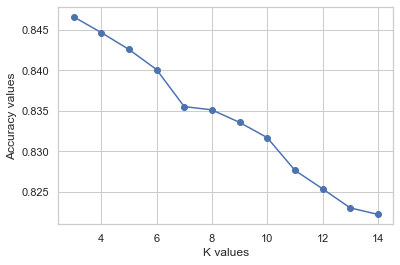

In [76]:
plt.plot(neighbors,acc_value,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy values")

from the plot we can see that optimal k value is 3 and hence running KNN for K=3

In [77]:
classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [78]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8466352624495289
Precision is : 0.8505304238993534
Recall is : 0.846528803946405
F1 score is : 0.8461793577755612



Confusion matrix

 [[5886 1529]
 [ 750 6695]]


### **4.3 SVM Classifier**

In [79]:
#importing SVC from SVM
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred=svm_rbf.predict(X_test)

In [80]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.7837146702557201
Precision is : 0.7866983227317537
Recall is : 0.7838170408574998
F1 score is : 0.7831914500512287



Confusion matrix

 [[6188 1227]
 [1987 5458]]


### **4.4 Decision Tree Classifier**

In [81]:
#importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(X_train,y_train)
y_pred=dec_tree_model.predict(X_test)

In [82]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8543741588156124
Precision is : 0.8549851760713668
Recall is : 0.8543322644323148
F1 score is : 0.8543005528153744



Confusion matrix

 [[6181 1234]
 [ 930 6515]]


### **4.5 Random Forest Classifier**

In [83]:
#importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rand_f=RandomForestClassifier()
rand_f.fit(X_train,y_train)
y_pred=rand_f.predict(X_test)

In [84]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8921265141318977
Precision is : 0.8923676548469034
Recall is : 0.8921017558748421
F1 score is : 0.892105171126023



Confusion matrix

 [[6524  891]
 [ 712 6733]]


### **4.6 Gradient Boosting Clasifier**

In [85]:
#importing GradientBoostingClasifier sfrom sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
grad_b=GradientBoostingClassifier()
grad_b.fit(X_train, y_train)
y_pred=grad_b.predict(X_test)

In [86]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.808950201884253
Precision is : 0.809865976487794
Recall is : 0.809004717444673
F1 score is : 0.8088271548118294



Confusion matrix

 [[6199 1216]
 [1623 5822]]


### **4.7 XGB Classifier**

In [87]:
#importing XGBClassifier from xgboost
from xgboost import XGBClassifier

In [88]:
xg_boost=XGBClassifier()
xg_boost.fit(X_train,y_train)
y_pred=xg_boost.predict(X_test)

[17:44:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8524226110363392
Precision is : 0.8532633106343974
Recall is : 0.8524718694567082
F1 score is : 0.8523466719402879



Confusion matrix

 [[6502  913]
 [1280 6165]]


### **Inference: Random Forest Classifier shows the highest accuracy between all the 7 models. Hence we will fine tune the same.**

## **5. Hyperparameter Tuning**

###  ***Let's fine tune our RF classifier model***:

In [90]:
pd.Series(rand_f.feature_importances_,index=x.columns).sort_values(ascending=False)*100

age               19.688863
nr.employed       12.852829
campaign           9.719912
job                8.667300
education          7.726066
day_of_week        7.679232
cons.conf.idx      5.668969
cons.price.idx     5.351586
contact            4.577848
marital            3.659062
loan               3.413741
any_loan           2.890189
default            2.814165
poutcome           2.713800
month              2.576439
dtype: float64

In [91]:
rf_tune = RandomForestClassifier(n_estimators=120, max_depth=200, random_state=123, criterion="entropy")

In [92]:
rf_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=200, n_estimators=120,
                       random_state=123)

In [93]:
y_pred=rf_tune.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.8942799461641991
Precision is : 0.8944679718735096
Recall is : 0.8942581855612772
F1 score is : 0.8942632016809178



Confusion matrix

 [[6551  864]
 [ 707 6738]]


### ***A small increase in Accuracy, Precision, Recall and F1 score was achieved after tuning.***

In [94]:
conf=confusion_matrix(y_test,y_pred)
conf={'values':['True Positive','False Positive','False Negative','True Negative'],'count':[conf[0,0],conf[0,1],conf[1,0],conf[1,1]]}
conf=pd.DataFrame(conf)
conf

,values,count
0,True Positive,6551
1,False Positive,864
2,False Negative,707
3,True Negative,6738


Created a dataframe 'conf' with confusion matrix values

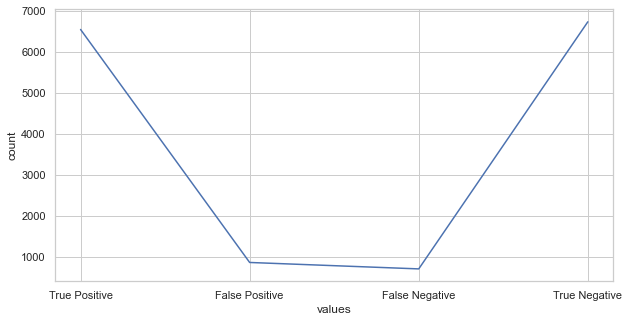

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(x=conf['values'],y=conf['count'])
plt.show()

In [ ]:
X_test.shape

Here we can see that out of 14,860 values, 13,254 (89.39%) are correctly predicted values comprised of true Positives and true negatives. There are only 1576 wrongly predicted values (10.61%).

In [96]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(2,20,2)
# Minimum number of samples required to split a node
min_samples_split = range(2,10,2)
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [97]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545, 549, 553, 557, 561, 565, 569, 573, 577, 581, 585, 589, 593, 597, 602, 606, 610, 614, 618, 622, 626, 630, 634, 638, 642, 646, 650, 654, 658, 662, 666, 670, 674, 678, 682, 686, 690, 694, 698, 702, 706, 710, 714, 718, 722, 726, 730, 734, 738, 742, 746, 750, 754, 758, 762, 766, 770, 774, 778, 782, 786, 790, 794, 798, 803, 807, 811, 815, 819, 823, 827, 831, 835, 839, 843, 847, 851, 855, 859, 863, 867, 871, 875, 879, 883, 887, 891, 895, 899, 903, 907, 911, 915, 919, 923, 927, 931, 935, 939, 943, 947, 951, 955, 959, 963, 967, 971, 975, 979, 983, 98

In [98]:
rf_Model = RandomForestClassifier()

In [99]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 57600 candidates, totalling 576000 fits


In [ ]:
rf_Grid.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

In [ ]:
rf_Grid.best_params_

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')